# Analysis of concrete strength with different quantity of materials used

## **Attribute Information**
   - **Cement**
     -- quantitative, kg in m3 mixture : The quantity of cement added to the concrete mixture. Cement forms the main ingredient in concrete mixture.
  
  
   - **Slag**
     -- quantitative -- kg in m3 mixture : Blast Furnace Slag is the residue iron mixture component added to increase the strength of the concrete mixture.


   - **Ash**
     -- quantitative -- kg in m3 mixture : Fly Ash is a carbon product(coal) added to reduce the amount of Cement in the mixture, it increases the workability,strength and durability of the concrete mixture.


   - **Water**
     -- quantitative -- kg in m3 mixture : Water component is self descriptive, water is added to mixture which transform into a gel like substance, usually seen in construction work. This substance on drying or exposure to heat yields a solid rock like product.


   - **Superplastic**
     -- quantitative -- kg in m3 mixture : Superplastic component removes any excess water molecules present in the mixture, excess water in the concrete leads to cracks,breaks and voids inside concrete.


   - **CourseAggregate**
     -- quantitative -- kg in m3 mixture : Coarse Aggregate are stones whose sizes is greater than 4.75mm.
     
     
     
   - **FineAggregate**
     -- quantitative -- kg in m3 mixture :  Fine Aggregate are natural sand or crushed stones whose size is less than 4.75mm.
     
     
   - **Age**
     -- quantitative -- Day (1~365) : The amount of time taken to harden the mixture into concrete. The strength of the concrete increases as more number of days pass by.
     
     
   - **Concrete Compresssive Strength**
     -- quantitative -- MPa : Compressive Strength is the maximum amount of load or pressure at which the concrete would break.

In [2]:
#Importing the necessary libraries required
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly
plotly.offline.init_notebook_mode() 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [3]:
#Importing the dataset
df1 = pd.read_csv('concrete.csv')
df1

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0      540.0    0.0    0.0  162.0           2.5     1040.0    676.0   28   
1      540.0    0.0    0.0  162.0           2.5     1055.0    676.0   28   
2      332.5  142.5    0.0  228.0           0.0      932.0    594.0  270   
3      332.5  142.5    0.0  228.0           0.0      932.0    594.0  365   
4      198.6  132.4    0.0  192.0           0.0      978.4    825.5  360   
...      ...    ...    ...    ...           ...        ...      ...  ...   
1025   276.4  116.0   90.3  179.6           8.9      870.1    768.3   28   
1026   322.2    0.0  115.6  196.0          10.4      817.9    813.4   28   
1027   148.5  139.4  108.6  192.7           6.1      892.4    780.0   28   
1028   159.1  186.7    0.0  175.6          11.3      989.6    788.9   28   
1029   260.9  100.5   78.3  200.6           8.6      864.5    761.5   28   

      strength  
0        79.99  
1        61.89  
2        40.27  
3        41.05  
4        44.30  
...        ...  
1025     44.28  
1026     31.18  
1027     23.70  
1028     32.77  
1029     32.40  

[1030 rows x 9 columns]

# Data Exploration and Cleaning

In [4]:
df1.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
df1.shape

(1030, 9)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
#Finding the number of missing values in the dataset
df1.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
# Dropping duplicate rows
df1[df1.duplicated()]
df1.drop_duplicates(inplace=True)
df1.shape

(1005, 9)

In [9]:
df1.describe().T

count        mean         std     min     25%    50%      75%  \
cement        1005.0  278.631343  104.344261  102.00  190.70  265.0   349.00   
slag          1005.0   72.043483   86.170807    0.00    0.00   20.0   142.50   
ash           1005.0   55.536318   64.207969    0.00    0.00    0.0   118.30   
water         1005.0  182.075323   21.339334  121.80  166.60  185.7   192.90   
superplastic  1005.0    6.033234    5.919967    0.00    0.00    6.1    10.00   
coarseagg     1005.0  974.376816   77.579667  801.00  932.00  968.0  1031.00   
fineagg       1005.0  772.688259   80.340435  594.00  724.30  780.0   822.20   
age           1005.0   45.856716   63.734692    1.00    7.00   28.0    56.00   
strength      1005.0   35.250378   16.284815    2.33   23.52   33.8    44.87   

                 max  
cement         540.0  
slag           359.4  
ash            200.1  
water          247.0  
superplastic    32.2  
coarseagg     1145.0  
fineagg        992.6  
age            365.0  
strength        82.6

## 1. What are the initial observations from the given data?

In [19]:
# Finding the interquartile ranges
q1=df1['cement'].quantile(q=0.25)
q3=df1['cement'].quantile(q=0.75)
iqr=q3-q1
print('1st quartile is :',q1)
print('3rd quartile is :',q3)
print('Interquartile range is :',iqr)

1st quartile is : 190.7
3rd quartile is : 349.0
Interquartile range is : 158.3


In [22]:
# Outlier detection from Interquartile range (IQR) in original data
LQ=q1-1.5*(iqr)
UQ=q3+1.5*(iqr)
print('Lower circuit: '+'{:.2f}'.format(LQ))
print('Upper circuit: ',UQ)

Lower circuit: -46.75
Upper circuit:  586.45


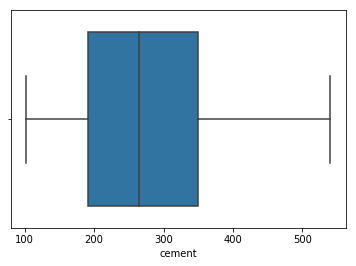

In [11]:
sns.boxplot(x='cement',data=df1)

C:\Users\jana\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



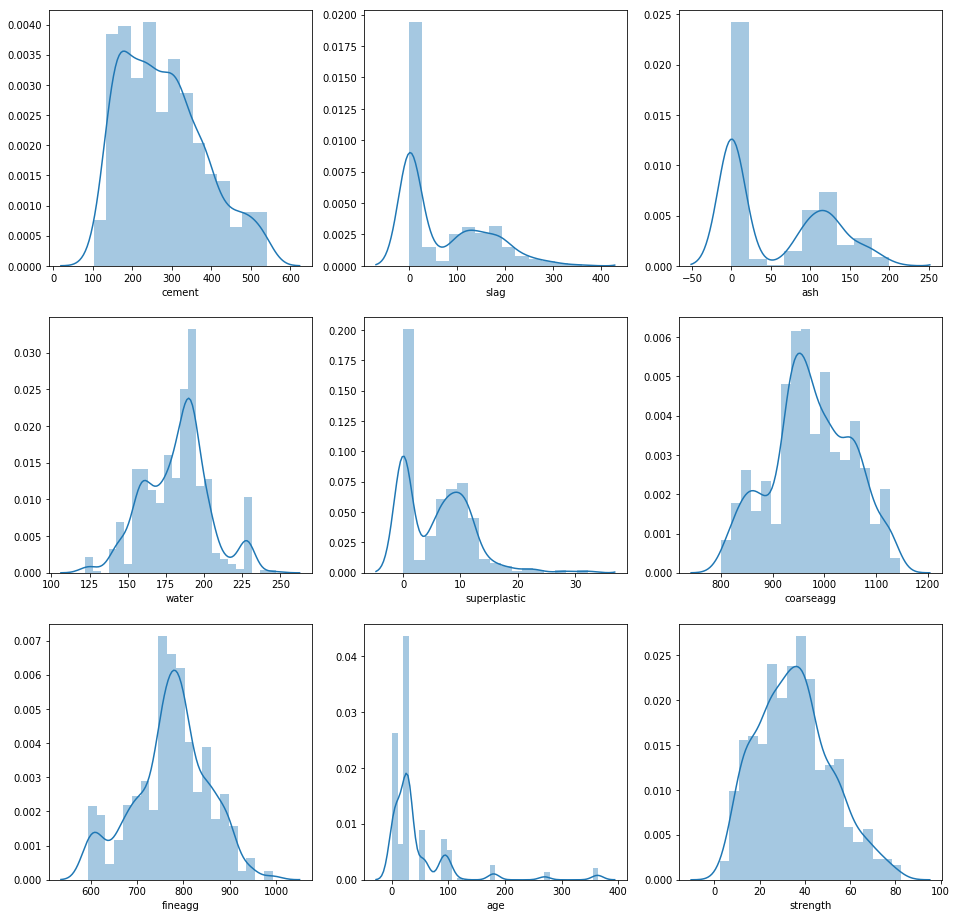

In [13]:
#Quality of Data in each and every material
#Distplot
fig,ax1=plt.subplots(3,3,figsize=(16,16))
sns.distplot(df1['cement'],ax=ax1[0][0])
sns.distplot(df1['slag'],ax=ax1[0][1])
sns.distplot(df1['ash'],ax=ax1[0][2])
sns.distplot(df1['water'],ax=ax1[1][0])
sns.distplot(df1['superplastic'],ax=ax1[1][1])
sns.distplot(df1['coarseagg'],ax=ax1[1][2])
sns.distplot(df1['fineagg'],ax=ax1[2][0])
sns.distplot(df1['age'],ax=ax1[2][1])
sns.distplot(df1['strength'],ax=ax1[2][2])

### Observations
1) Cement, coarseagg and fineagg is normally distibuted

2) Superplastic, slag, ash and age are rightly skewed

3) Water is left skewed

## 2. What is the relationship between each attribute?

<Figure size 50400x14400 with 0 Axes>

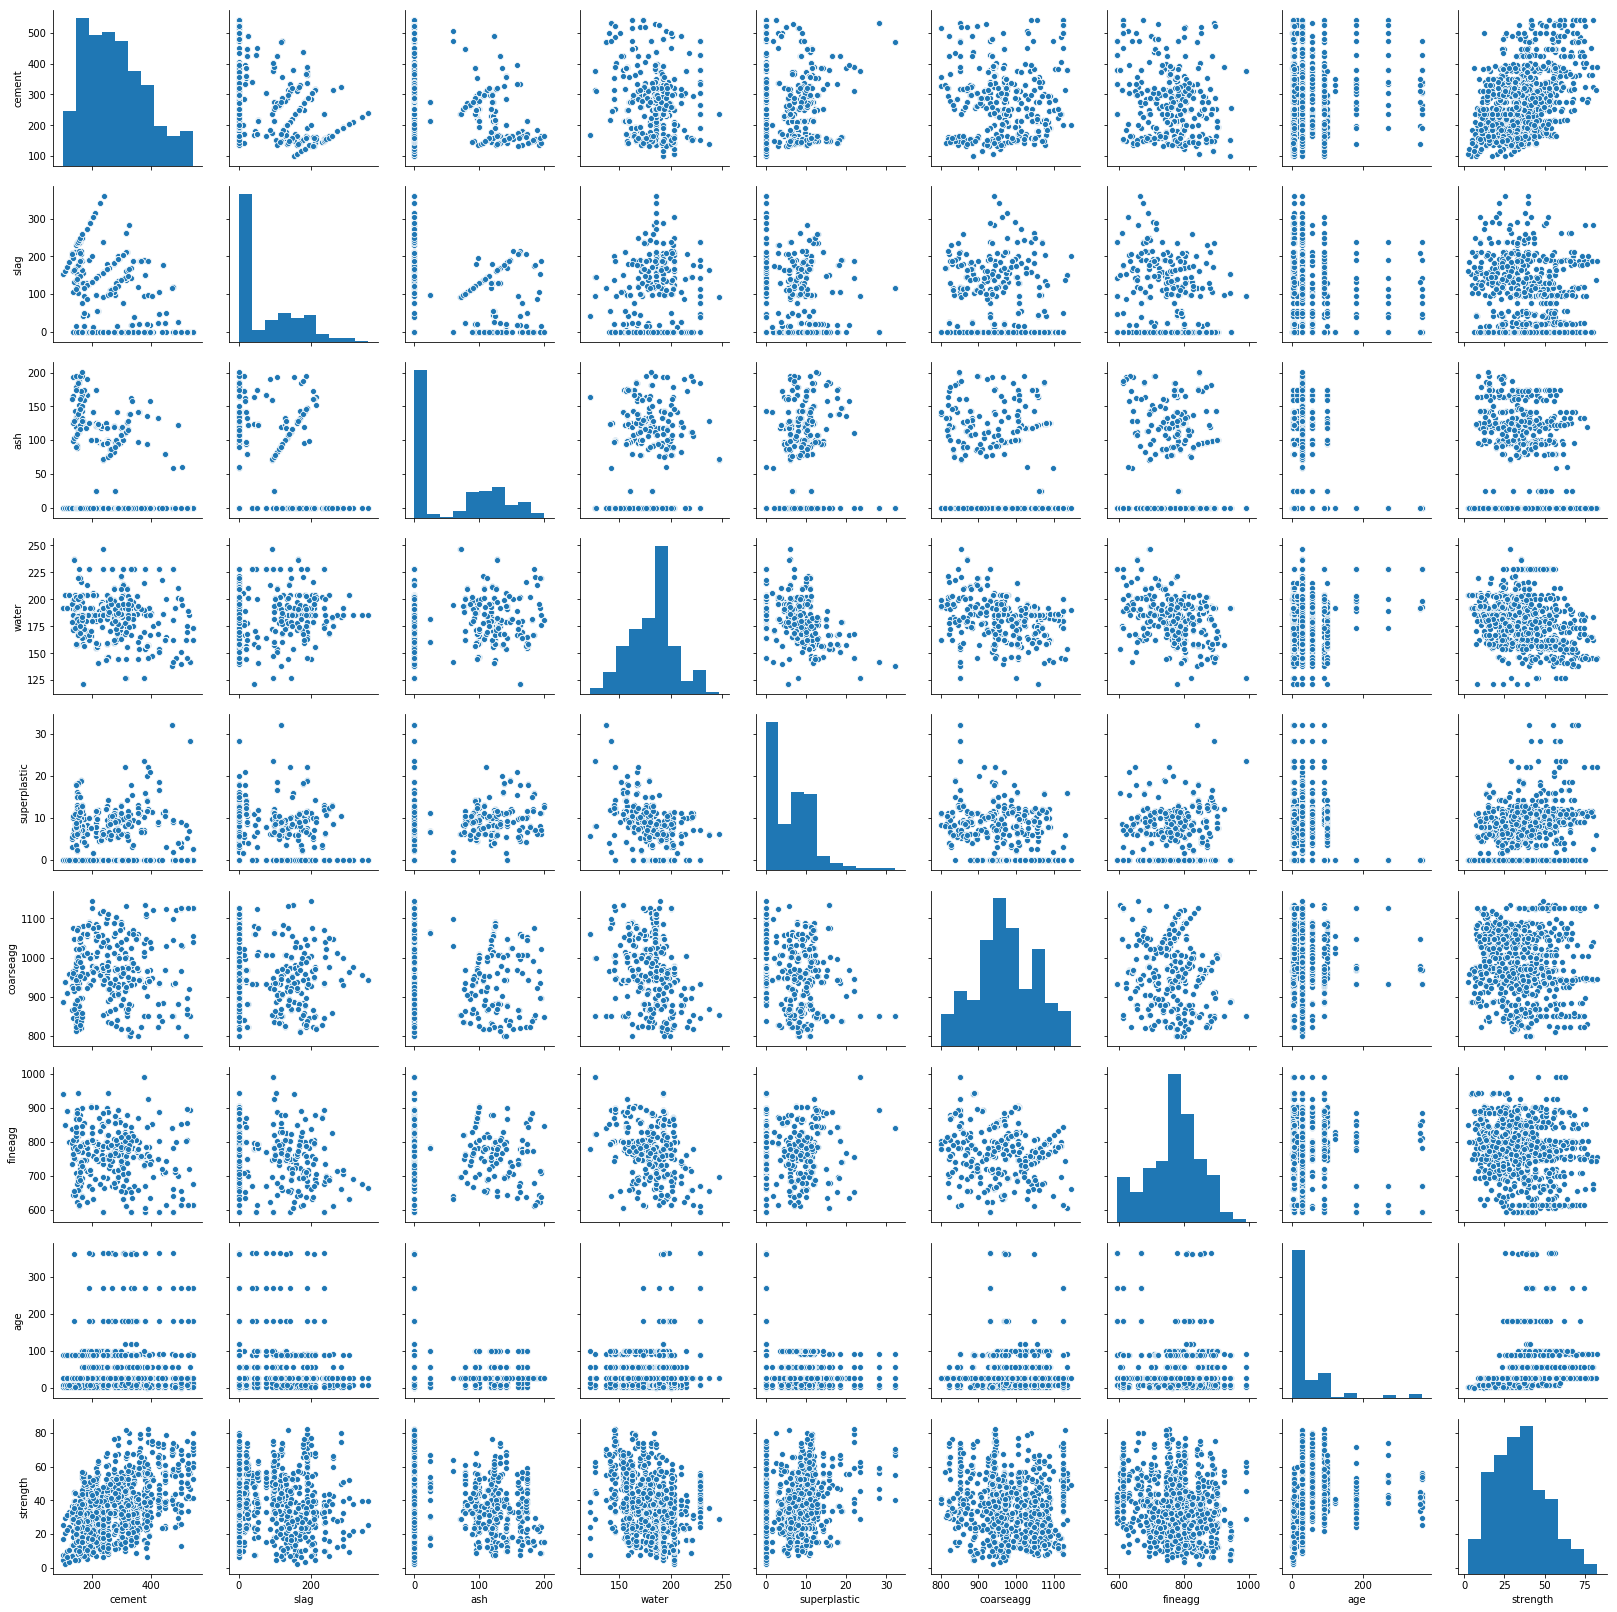

In [14]:
plt.figure(figsize=(700,200))
sns.pairplot(df1)

### Observations from pair plot
1) Only cement has a linear relationship with strength.


2) The strength of concrete has a non linear relationship with the ingredients used in making it.

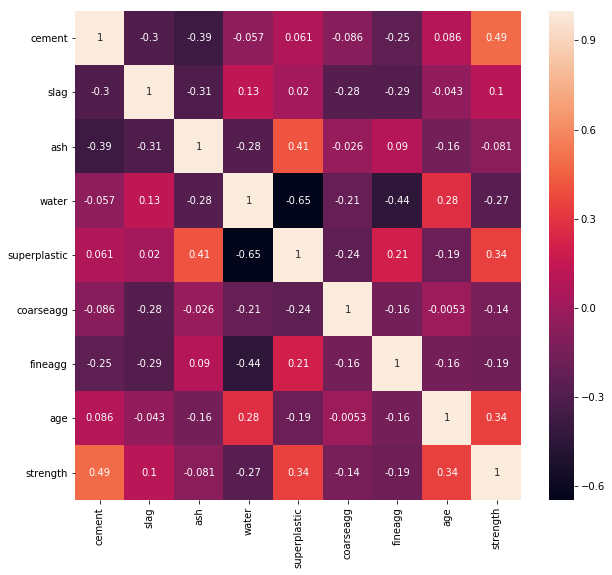

In [15]:
plt.figure(figsize=(10,9))
sns.heatmap(df1.corr(),annot=True)


### Observations from HeatMap
1) Strength has a positive correlation between cement, superplastic and age

2) Stregnth has a negative correlation between water,fineagg, coarseagg and ash

3) Superplastic has a high negative correlation with water

## 3.  What is the relationship between output variable (strength) with cement, age and water?

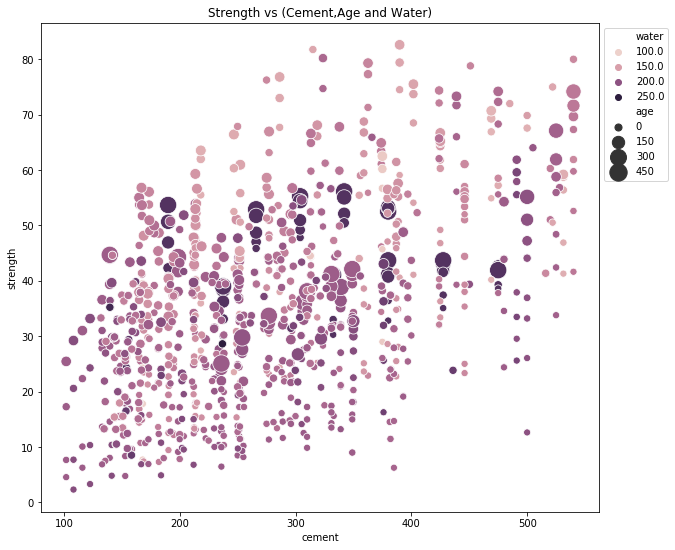

In [16]:

plt.figure(figsize=(10,9))
ax=sns.scatterplot(y='strength',x='cement',hue='water',size='age',data=df1,sizes=(50,300))
ax.set_title('Strength vs (Cement,Age and Water)')
ax.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()


### Observations from the scatterplot between Strength and (Cement, water and age)
1) Stregnth increases with increase in cement

2) Strength increases with increase in age

3) Cement with high age requires more water to increase strength

4) When age is less, more cement is required to increase the stregnth

5) Stregnth increase when less water is used in preparing the concrete

## 4. What is the relationship between output variable (strength) with fineagg, super plastic and ash?

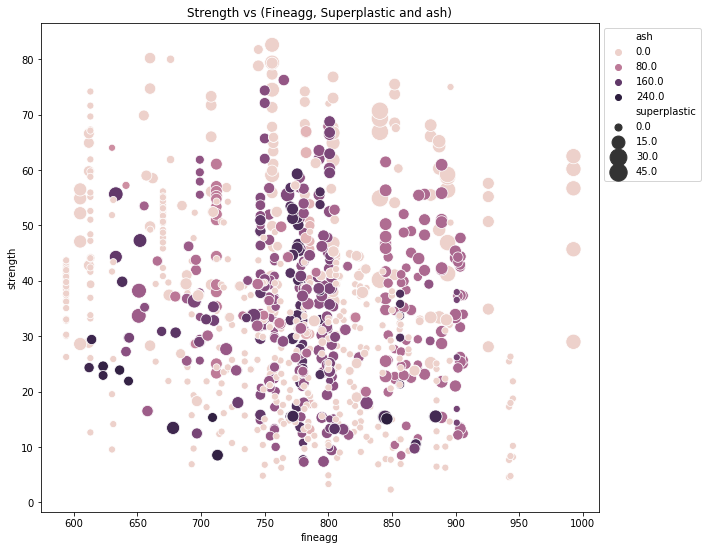

In [17]:
# Analysis of strength with two negative correlations and one postivie correlation material
plt.figure(figsize=(10,9))
ax=sns.scatterplot(y='strength',x='fineagg',hue='ash',size='superplastic',data=df1,sizes=(50,300))
ax.set_title('Strength vs (Fineagg, Superplastic and ash)')
ax.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()

### Observations from the scatterplot between Strength and (Fineagg, Superplastic and ash)
1) Strength decreases with increase in ash

2) Strength can be increased with the usage of superplastic when more fineagg is present.

## 5. What is the relationship between output variable (strength) with fineagg,superplastic and water?

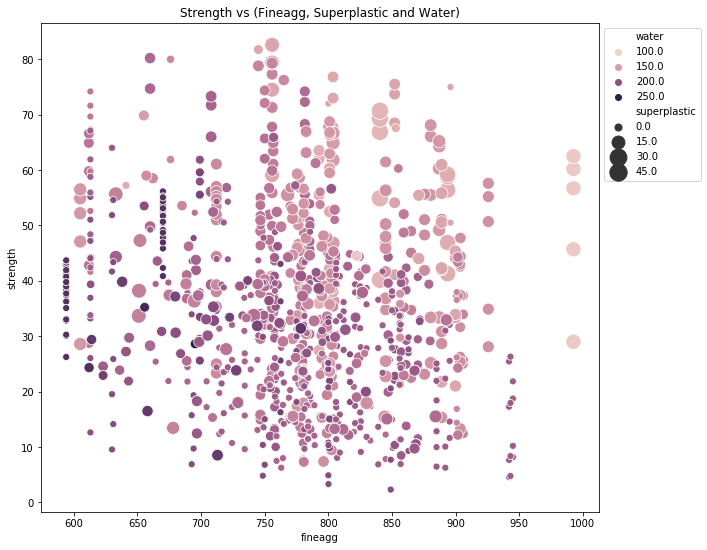

In [18]:
plt.figure(figsize=(10,9))
ax=sns.scatterplot(y='strength',x='fineagg',hue='water',size='superplastic',data=df1,sizes=(50,300))
ax.set_title('Strength vs (Fineagg, Superplastic and Water)')
ax.legend(loc='upper left',bbox_to_anchor=(1, 1))
plt.show()


### Observations
1) When there is presence of more fineagg and less water, superplastic can be used to increase the stregnth of the concrete.

2) Superplastic can be used to increase the stregnth of concrete in drought affected places.

## 6. a) What proportion of the ingredients in the mixture produce the highest strength?

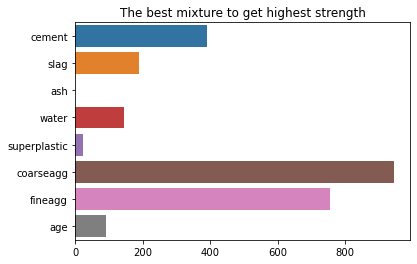

In [11]:
df2=df1.sort_values('strength',ascending=False)
pie=df2.iloc[:1,[0,1,2,3,4,5,6,7]]
st=pie.stack()
new=[j for i,j in st.index]
a=sns.barplot(x=st,y=new)
a.set_title('The best mixture to get highest strength');


## 6. b) What proportion of the ingredients in the mixture produce the lowest strength?

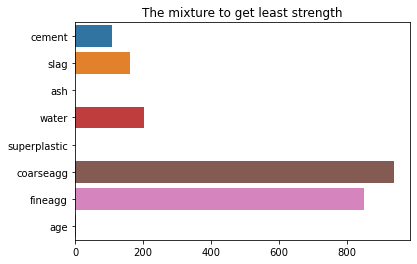

In [13]:
pie1=df2.iloc[-1:,[0,1,2,3,4,5,6,7]]
pie1
st1=pie1.stack()
new1=[j for i,j in st1.index]
b=sns.barplot(x=st1,y=new1)
b.set_title('The mixture to get least strength');

### Observations
1) Comparing the two graphs, cement and age, are very important to get a high strength of the concrete.

